In [208]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 7.0)
from mpl_toolkits.mplot3d import Axes3D

In [209]:
data = pd.read_csv('housing/train.csv')
data[:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [210]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Pearson correlation coefficient for each numeric variable 

In [211]:
y= data['SalePrice'].values
x1 =data['GrLivArea'].values
x2= data['OverallQual'].values
x3=data['LotArea'].values
x4=data['MSSubClass'].values
x6=data['YearBuilt'].values
x7=data['GarageArea'].values
x8=data['BedroomAbvGr'].values
print(np.corrcoef(x1, y)[0, 1])
print(np.corrcoef(x2, y)[0, 1])
print(np.corrcoef(x3, y)[0, 1])
print(np.corrcoef(x4, y)[0, 1])
print(np.corrcoef(x6, y)[0, 1])
print(np.corrcoef(x7, y)[0, 1])
print(np.corrcoef(x8, y)[0, 1])

0.7086244776126522
0.7909816005838047
0.26384335387140573
-0.08428413512659526
0.5228973328794969
0.6234314389183617
0.16821315430074


In [212]:
df=data[['GrLivArea','OverallQual','SalePrice']]
df.dropna(how='all')
df[:2]
#GrLivArea : Above grade (ground) living area square

#OverallQual: Rates the overall material and finish of the house
#10	Very Excellent
#9	Excellent
#8	Very Good
#7	Good
#6	Above Average
#5	Average
#4	Below Average
#3	Fair
#2	Poor
#1	Very Poor'''
  

,GrLivArea,OverallQual,SalePrice
0,1710,7,208500
1,1262,6,181500


### Converting series to numpy array

In [213]:
m = len(data)
x0 = np.ones(m)
x1 = df['GrLivArea'].values
x2= df['OverallQual'].values
y= df['SalePrice'].values

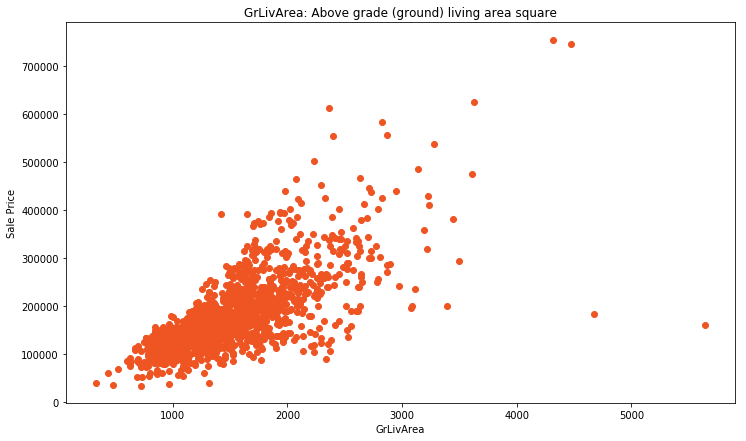

In [214]:
plt.scatter(x1, y, c='#ef5423')
plt.title("GrLivArea: Above grade (ground) living area square")
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.show;

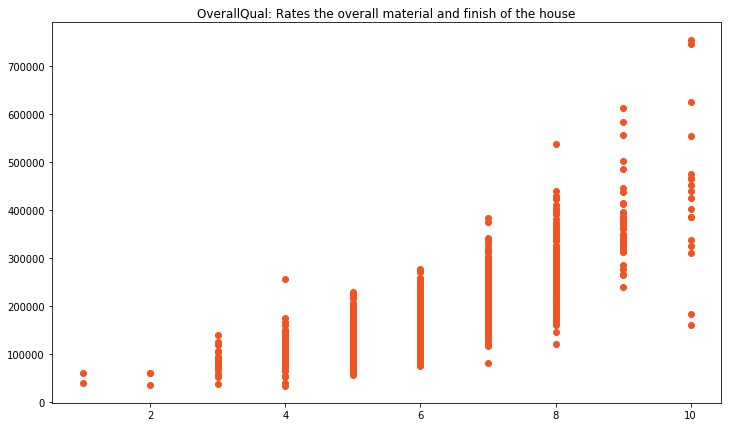

In [215]:
plt.scatter(x2, y, c='#ef5423');
plt.title("OverallQual: Rates the overall material and finish of the house")
plt.show;

In [216]:
X = np.array([x1,x2,x0]).T
W = np.array([1,3000,50])
Y = np.array(y)

In [217]:
def loss_fuction(W,X,Y):
    n=len(Y)
    return np.sum(((np.dot(X,W)-Y)**2)/n)

In [218]:
loss_fuction(W,X,Y)

31686270767.713013

In [219]:
def gradientDescent(X, Y, W, alpha, iters):
    cost_history={}
    cost_list=[]
    all_w=[]
    n=len(Y)    

    for i in range(iters):
       

        grad=[]
        for i in range(len(W)):
            grad.append((np.dot((np.dot(X,W)-Y),X.T[i]))/n)
        
        W =W-alpha*np.array(grad)
        all_w.append(W)
        cost1 = loss_fuction(W,X,Y)
        cost_history[cost1]=W
        cost_list.append(cost1)
    cost = loss_fuction(W,X, Y)
    return W, cost,cost_history,cost_list,all_w

In [220]:
W = np.array([54.20962683,24118.54871234,-45556.20316764])
W,c,ch,c_l,all_ww=gradientDescent(X, Y, W,7.808877989e-07,5000)
print(W,c)
first2pairs = {k: ch[k] for k in list(ch)[1:6]}
first2pairs
#array([    54.1932674 ,  24119.20376577, -45560.43267704]) 1969233456.6595368
#[9.69930842e+09 3.64976698e+07 5.66815921e+06] 2.4202567550724976e+26

[9.69930842e+09 3.64976698e+07 5.66815921e+06] 2.4202567550724976e+26


{1969256787.7830224: array([    54.20962692,  24118.55073141, -45556.21620198]),
 1969256800.1600137: array([    54.2096269 ,  24118.5503949 , -45556.21402959]),
 1969256812.537006: array([    54.20962689,  24118.55005839, -45556.2118572 ]),
 1969256824.913999: array([    54.20962687,  24118.54972188, -45556.20968481]),
 1969256837.290993: array([    54.20962686,  24118.54938536, -45556.20751242])}

### Lost values for each iteration

In [221]:
min(c_l)

1969233456.6595368

In [222]:
ch[1969233456.6595368]

array([    54.1932674 ,  24119.20376577, -45560.43267704])

In [223]:
ch_num=np.array(c_l[1750:2150])
#ch_num=np.log10(ch_num)
ch_num[:8]

array([1.96923521e+09, 1.96923520e+09, 1.96923519e+09, 1.96923518e+09,
       1.96923516e+09, 1.96923515e+09, 1.96923514e+09, 1.96923513e+09])

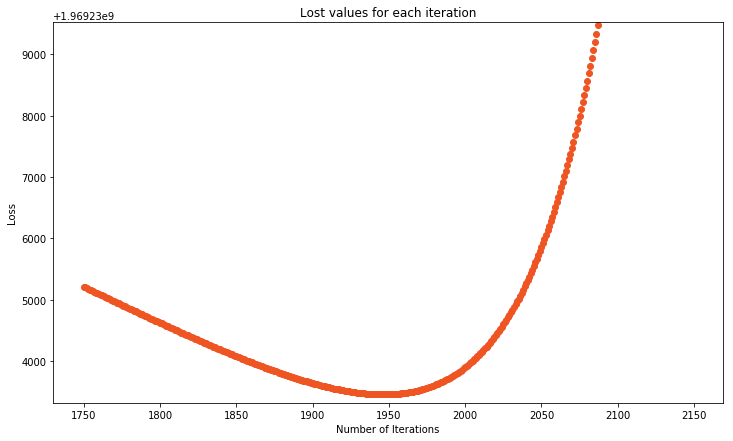

In [224]:
plt.scatter(range(1750,2150), ch_num, c='#ef5423', label='Scatter Plot');
plt.title("Lost values for each iteration")
plt.xlabel('Number of Iterations')
plt.ylabel('Loss');
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([1969233320.6595368,1969239520.7830224]);

### Assign the best value for W

In [225]:
W=ch[1969233456.6595368]
W

array([    54.1932674 ,  24119.20376577, -45560.43267704])

### w1 values vs iterations 

In [226]:
x11=[]
for i in all_ww:
    x11.append(i[0])
#x11[4500:5000]

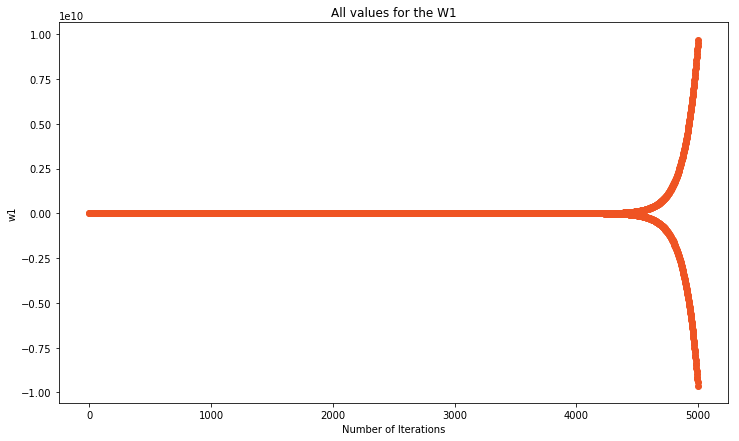

In [227]:
plt.scatter(range(len(x11)), x11, c='#ef5423', label='Scatter Plot');
plt.title("All values for the W1")
plt.xlabel('Number of Iterations')
plt.ylabel('w1');

### R squared value for train dataset

In [228]:
Predict=np.dot(X,W)
nn=len(Predict)
u1=np.sum(np.dot(Predict,Y))
u2=np.sum(Predict)*np.sum(Y)
L1=(nn*np.sum(Predict**2)-(np.sum(Predict)**2))
L2=(nn*np.sum(Y**2)-(np.sum(Y)**2))
r=(nn*u1-u2)/((L1*L2)**(1/2))
print('R squared value for train data set :',r)

R squared value for train data set : 0.8431136562060879


### Comparing means

In [229]:
print(Predict.mean())
print(Y.mean())

183678.1197425641
180921.19589041095


### Actual values vs predicted values for train dataset

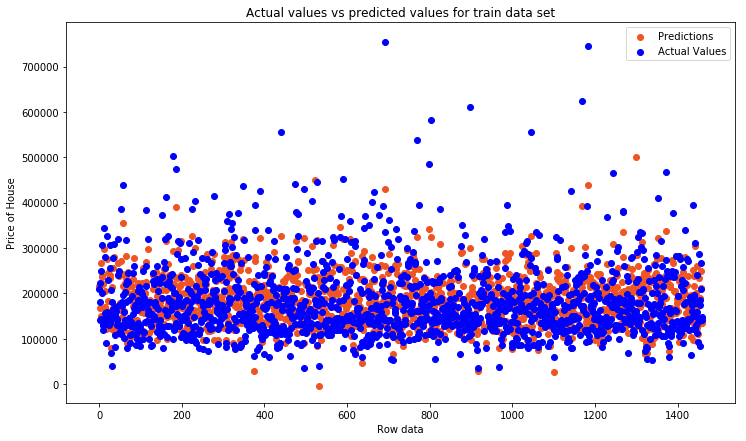

In [230]:
plt.scatter(range(1460), Predict, c='#ef5423', label='Predictions')
plt.scatter(range(1460), Y, c='blue', label='Actual Values');
plt.title("Actual values vs predicted values for train data set")
plt.xlabel('Row data')
plt.ylabel('Price of House')
plt.legend()
plt.show()

### Predicted and actual house price for train dataset with respect to two attribute(GrLivArea,OverallQual)

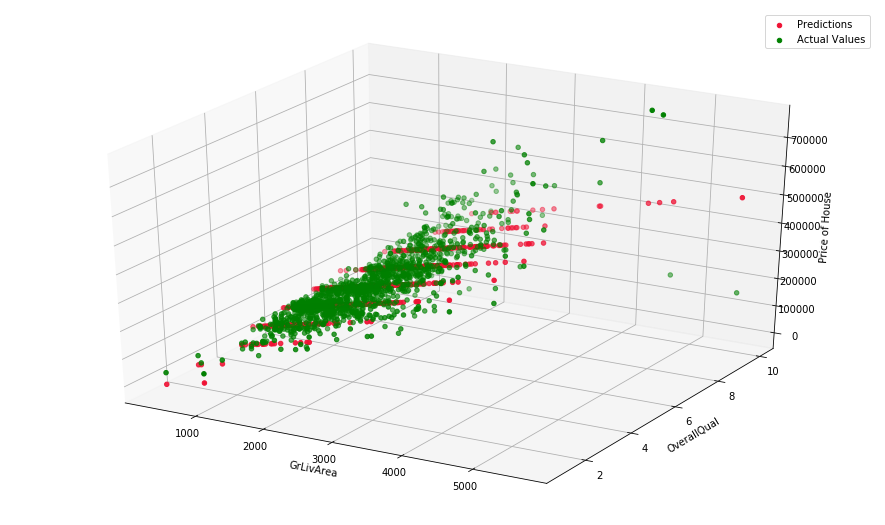

In [231]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1,x2,Predict, color='#ef1234',label='Predictions')
ax.scatter(x1,x2,Y, color='green',label='Actual Values')
plt.xlabel('GrLivArea')
plt.ylabel('OverallQual')
ax.set_zlabel('Price of House')
plt.legend()
plt.show()

## Testing for test dataset

In [232]:
test_data = pd.read_csv('housing/test.csv')
test_price=pd.read_csv("housing/sample_submission.csv")
l=len(test_data)
T_x0=np.ones(l)
T_x1 = test_data['GrLivArea'].values
T_x2= test_data['OverallQual'].values
T_y=test_price['SalePrice'].values
T_X = np.array([T_x1,T_x2,T_x0]).T
T_Predict=np.dot(T_X,W)
T_Y=np.array(T_y)

In [233]:
test_data[:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [234]:
test_price[:3]

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570


### Predicted and actual house price for test dataset with respect to two attribute(GrLivArea,OverallQual)

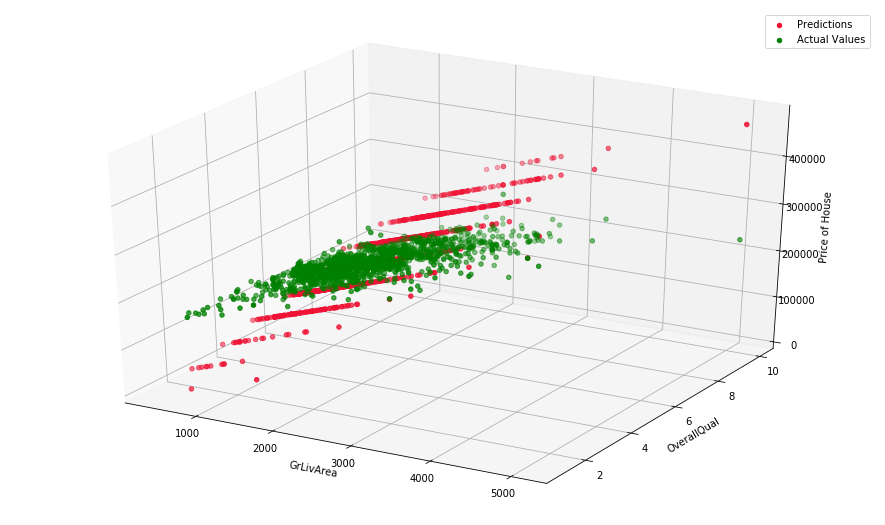

In [235]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(T_x1,T_x2,T_Predict, color='#ef1234',label='Predictions')
ax.scatter(T_x1,T_x2,T_Y, color='green',label='Actual Values')
plt.xlabel('GrLivArea')
plt.ylabel('OverallQual')
ax.set_zlabel('Price of House')
plt.legend()
plt.show()

### Comparing means for test dataset

In [236]:
print(T_Predict.mean())
print(T_Y.mean())

181589.5763476215
179183.91824266256


## R squared for test dataset

In [237]:
nn=len(T_Predict)
u11=np.sum(np.dot(T_Predict,T_Y))
u22=np.sum(T_Predict)*np.sum(T_Y)
L11=(nn*np.sum(T_Predict**2)-(np.sum(T_Predict)**2))
L22=(nn*np.sum(T_Y**2)-(np.sum(T_Y)**2))
r1=(nn*u11-u22)/((L11*L22)**(1/2))
r1

0.33644824590642264

### Building a model using python module

In [238]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='SalePrice ~ GrLivArea + OverallQual', data=df).fit()
print(lm.params)

Intercept     -104092.669636
GrLivArea          55.862226
OverallQual     32849.047441
dtype: float64


In [239]:
www=np.array([55.862226,32849.047441,-104092.669636])

### Comparing the total lost of both models

In [240]:
loss_fuction(www,X,Y) # Total lost from build in modle

1802649051.7586782

In [241]:
loss_fuction(W,X,Y) # Total lost from our model

1969233456.6595368

In [242]:
1969233456.6595368-1802649051.7586782

166584404.90085864

In [243]:
print('Percentage for deviation :',(166584404.90085864/1969233456.6595368)*100,"%")

Percentage for deviation : 8.459352766809081 %


### R squared for model built using python functions

In [244]:
Predi_f=np.dot(X,www)
nn=len(Predi_f)
u1=np.sum(np.dot(Predi_f,Y))
u2=np.sum(Predi_f)*np.sum(Y)
L1=(nn*np.sum(Predi_f**2)-(np.sum(Predi_f)**2))
L2=(nn*np.sum(Y**2)-(np.sum(Y)**2))
r=(nn*u1-u2)/((L1*L2)**(1/2))
print('R squared value for train data set :',r)

R squared value for train data set : 0.8450877016297684


### R squared comparison: our(0.8431136562060879) vs model built using python functions(0.8450877016297684)